# Blocksim

`tbcontrol.blocksim` is a simple library for simulating the kinds of block diagrams you would encounter in a typical undergraduate control textbook. Let's start with the most basic example of feedback control.

![](../assets/simple_feedback.png)

In [1]:
from tbcontrol import blocksim

Our first job is to define objects representing each of the blocks. A common one is the LTI block

In [2]:
Gp = blocksim.LTI('Gp', 'u', 'y', 10, [100, 1], 50)

In [3]:
Gp

LTI: u →[ Gp ]→ y

In [4]:
Gc = blocksim.PI('Gc', 'e', 'u', 0.1, 50)

In [5]:
Gc

PI: e →[ Gc ]→ u

Once we have the blocks, we can create a Diagram.

Sums are specified as a dictionary with the keys being the output signal and the values being a tuple containing the input signals. The leading + is compulsory.

The inputs come next and are specified as functions of time. `Blocksim.step()` can be used to build a step function.

In [6]:
diagram = blocksim.Diagram([Gp, Gc], 
                           sums={'e': ('+ysp', '-y')}, 
                           inputs={'ysp': blocksim.step()})

In [7]:
diagram

LTI: u →[ Gp ]→ y
PI: e →[ Gc ]→ u

Blocksim is primarily focused on being able to simulate a diagram. The next step is to create a time vector and do the simulation.

In [8]:
import numpy

The time vector also specifies the step size for integration.

In [9]:
ts = numpy.linspace(0, 1000, 10000)

In [10]:
simulation_results = diagram.simulate(ts, progress=True)

The result of `simulate()` is a dictionary containing the simulation results.

In [11]:
import matplotlib.pyplot as plt

In [12]:
%matplotlib inline

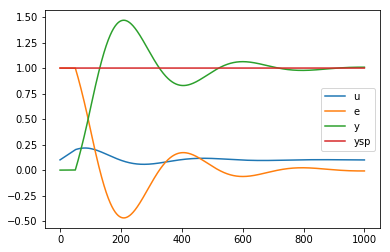

In [13]:
for signal, value in simulation_results.items():
    plt.plot(ts, value, label=signal)
plt.legend()

## Re-using parts of a diagram

Let's compare the output of a PI and a PID controller on this system. We've already got the PI response, which we should store.

In [14]:
y_pi = simulation_results['y']

Let's swap out the PI controller for a PID.

In [15]:
Gc_pid = blocksim.PID('Gc', 'e', 'u', 0.1, 50, 25)

In [16]:
diagram.blocks = [Gp, Gc_pid]

In [17]:
simulation_results = diagram.simulate(ts, progress=True)

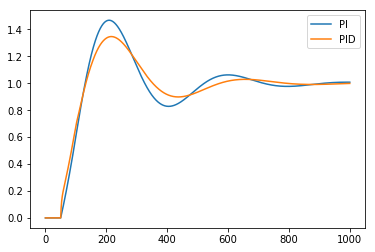

In [18]:
plt.plot(ts, y_pi, label='PI')
plt.plot(ts, simulation_results['y'], label='PID')
plt.legend()

In [19]:
We can see that adding the derivative action has improved control.

SyntaxError: invalid syntax (<ipython-input-19-1f9f4790d92a>, line 1)